In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import re

from nltk.corpus import stopwords
from wordcloud import WordCloud

from collections import Counter
from sklearn.utils import resample

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

In [2]:
real_news_ds = pd.read_csv("True.csv")
fake_news_ds = pd.read_csv("Fake.csv")

# Real news dataset analyses

In [3]:
real_news_ds.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
real_news_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


<b> As we can see above the real news dataset has 4 columns(title, text, subject and date) and 21417 entries(rows).
The data type of all columns are object. </b>

In [5]:
real_news_ds.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

<AxesSubplot:>

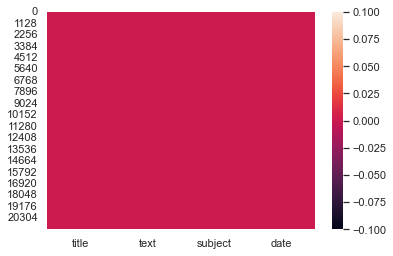

In [6]:
sns.heatmap(real_news_ds.isnull())

<b> As we can see above the real news dataset does not have any null value. </b>

In [7]:
real_news_ds.duplicated().sum()

206

In [8]:
real_news_ds.drop_duplicates(inplace=True)

In [9]:
real_news_ds.duplicated().sum()

0

<b> The real news dataset had 206 duplicated entries. In order to have a more accurated analyses we discarted all duplicated entries.</b>

C:\Users\raelg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

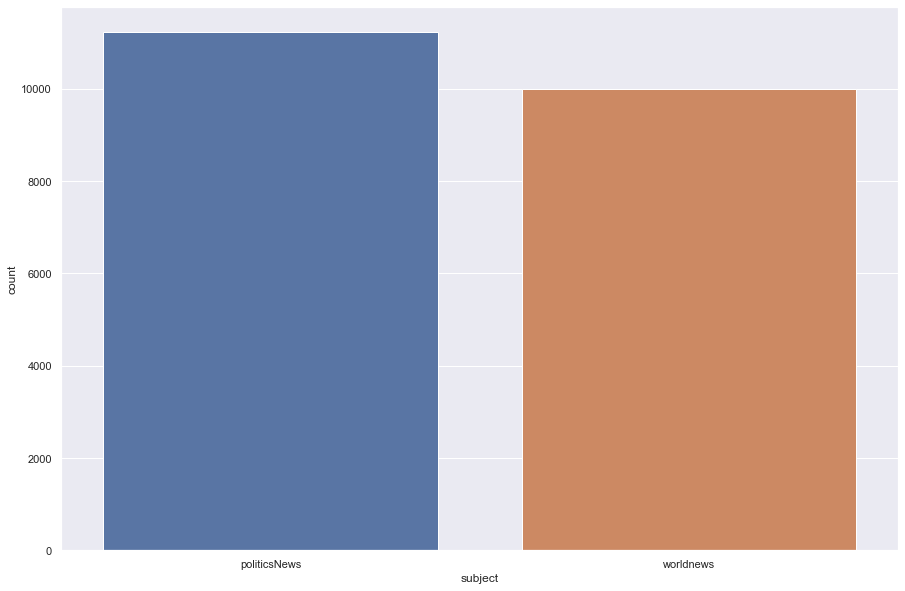

In [10]:
real_news_ds['subject'].value_counts()
plt.figure(figsize = (15,10))
sns.countplot(real_news_ds['subject'])

<b> Here we can see that there are only 2 categories of news in the real dataset. The top news is politicsNews. </b>

In [11]:
real_news_ds['date'].min()

'April 1, 2016 '

In [12]:
real_news_ds['date'].max()

'September 9, 2017 '

<b> Above we can see that the data from the real news dataset was collected for less than 2 years. It was collected from April 1, 2016 to September 9, 2017. </b>

# Fake news dataset analyses

In [13]:
fake_news_ds.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [14]:
fake_news_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<b> As we can see above the fake news dataset has 4 columns(title, text, subject and date) and 23481 entries(rows).
The data type of all columns are object. </b>

In [15]:
fake_news_ds.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

<AxesSubplot:>

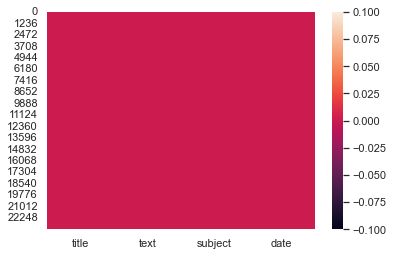

In [16]:
sns.heatmap(fake_news_ds.isnull())

<b> As we can see above the fake news dataset does not have any null value. </b>

In [17]:
fake_news_ds.duplicated().sum()

3

In [18]:
fake_news_ds.drop_duplicates(inplace=True)

In [19]:
fake_news_ds.duplicated().sum()

0

C:\Users\raelg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

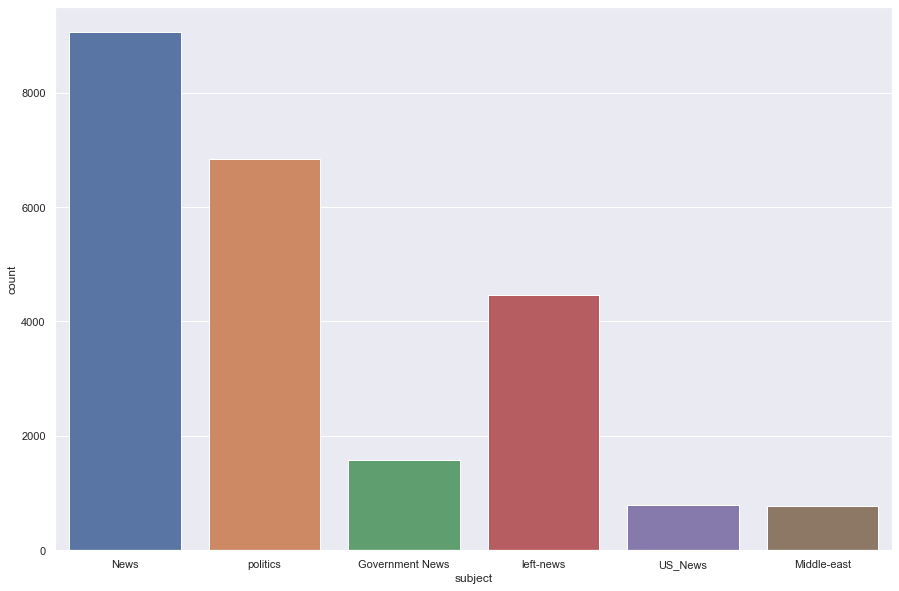

In [20]:
fake_news_ds['subject'].value_counts()
plt.figure(figsize = (15,10))
sns.countplot(fake_news_ds['subject'])

<b> Here we can see that there are 6 categories of news in the fake dataset. The top news is News. </b>

In [21]:
fake_news_ds['date'].min()

'14-Feb-18'

<b> The fake news dataset had 3 duplicated entries and in order to have a more accurated analyses we discarted all duplicated entries.</b>

In [22]:
fake_news_ds['date'].max()

'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg'

<b> As you can see above, when we tried to get the date of the latest news of the dataset it returned a hyperlink instead.
    In order to understand why it is happening we will extract individualy the day, month and year of the date column and analyse it.
</b>

In [23]:
x='June 28, 2016'
re.split('\s',x,1)

fake_news_ds['month']=fake_news_ds['date'].apply(lambda x:re.split('\s',x,1)[0])

<b> First we extracted the day </b>

In [24]:
x='June 28, 2016'
re.search('\d{2}',x).group()

def _day_(x):
    try:
        value=re.search('\d{2}',x).group()
    except:
        value= fake_news_ds['day']=np.nan
    return value
fake_news_ds['day']=fake_news_ds['date'].apply(_day_)

<b> After extracting the day we extracted the month </b>

In [25]:
x='June 28, 2016'
re.search('\d{4}',x).group()

def _year_(x):
    try:
        value=re.search('\d{4}',x).group()
    except:
        value= fake_news_ds['year']=np.nan
    return value
fake_news_ds['year']=fake_news_ds['date'].apply(_year_)

<b> At last we extracted the year</b>

In [26]:
fake_news_ds.isnull().sum()

title       0
text        0
subject     0
date        0
month       0
day         1
year       39
dtype: int64

In [27]:
fake_news_ds.dropna(inplace=True)

In [28]:
fake_news_ds.isnull().sum()

title      0
text       0
subject    0
date       0
month      0
day        0
year       0
dtype: int64

<b> As shown above one of the entries did not have the day of the news and 39 entries did not have a year. for a better analyses we discarted those entries. </b>

In [29]:
fake_news_ds.day.unique()

array(['31', '30', '29', '25', '23', '22', '21', '20', '19', '17', '16',
       '13', '12', '11', '10', '28', '27', '26', '24', '18', '15', '14'],
      dtype=object)

<b> Here we can see that everything looks okay in the day analyses. </b>

In [30]:
fake_news_ds.month.unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January', 'Dec',
       'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'Apr', 'Mar', 'Feb',
       'Jan',
       'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
       'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg'],
      dtype=object)

<b> Here we can see that the dataset has hyperlink mixed with the months. That is why we are getting hyperlinks while trying to get news dates.</b>

In [31]:
fake_news_ds[fake_news_ds['month']== 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg']

,title,text,subject,date,month,day,year
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,20,2015


In [32]:
fake_news_ds.drop([15839,17432,21869],axis=0,inplace=True)

In [33]:
fake_news_ds[fake_news_ds['month']=='https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg']

,title,text,subject,date,month,day,year
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,20,2015


In [34]:
fake_news_ds.drop([15840,17433,21870],axis=0,inplace=True)

In [35]:
fake_news_ds.month.unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January', 'Dec',
       'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'Apr', 'Mar', 'Feb',
       'Jan'], dtype=object)

<b> We used the hyperlink to get the columns indexes. Once we had the indexes we were able to drop the columns containing the hyperlink. As we can see above it solved the malformation data issue on the month column. </b> 

In [36]:
fake_news_ds.year.unique()

array(['2017', '2016', '2015'], dtype=object)

<b> Above we can see that everything looks okay in the year analyses. </b> 

In [37]:
fake_news_ds['date'].max()

'September 9, 2017'

In [38]:
fake_news_ds['date'].min()

'Apr 1, 2015'

<b> Now we are able to see that the data was collected from April 1, 2015 to September 9, 2017. It means that the data was collected for more than 2 years. </b> 

# Combining and Preparing real and fake dataset for Model

In [39]:
real_news_ds['label'] = 1
fake_news_ds['label'] = 0

combined_news_ds = pd.concat([real_news_ds, fake_news_ds])

<b> The first step taken in order to prepare the datasets for the model was to create a new column called label. This column will have int as data type. The column will have the value of 1 for the real news and 0 for the fake news. After it we needed to combine the true and the fake datasets.  </b> 

In [40]:
combined_news_ds.head(5)

,title,text,subject,date,label,month,day,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,NaN,NaN,NaN
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,NaN,NaN,NaN
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,NaN,NaN,NaN
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,NaN,NaN,NaN


In [41]:
combined_news_ds = combined_news_ds.drop(['month', 'day', 'year'], axis=1);

<b> As show above we droped the day, month and year column as they wont be used in the model. They were only created in order to identify and fix the malformation data of the date column. </b> 

In [42]:
combined_news_ds.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [43]:
combined_news_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44644 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44644 non-null  object
 1   text     44644 non-null  object
 2   subject  44644 non-null  object
 3   date     44644 non-null  object
 4   label    44644 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [44]:
combined_news_ds.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [45]:
combined_news_ds.duplicated().sum()

0

<b> We performed some operations to assure that the merging did not altear the data creating null or duplicated values.  </b> 

[Text(0, 0, '0'), Text(1, 0, '1')]

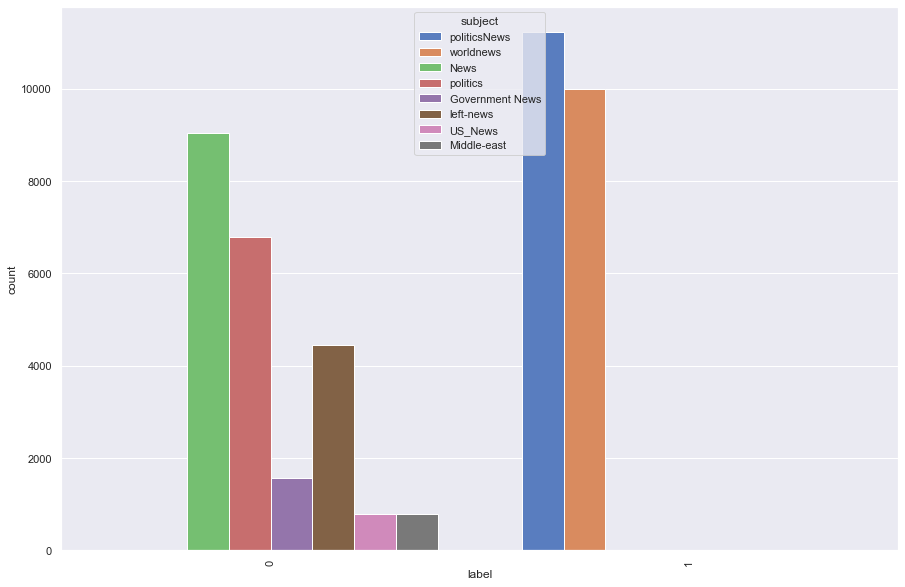

In [46]:
plt.figure(figsize = (15,10))
chart = sns.countplot(x = "label", hue = "subject" , data = combined_news_ds , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

<b> Here we can see that the real news belongs to only 2 categories. It might be because of the election year in USA (2016) and also because the data was collected in a short period of time.  </b> 

In [47]:
combined_news_ds['date'] = pd.to_datetime(combined_news_ds['date'])

In [48]:
combined_news_ds.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
label               int64
dtype: object

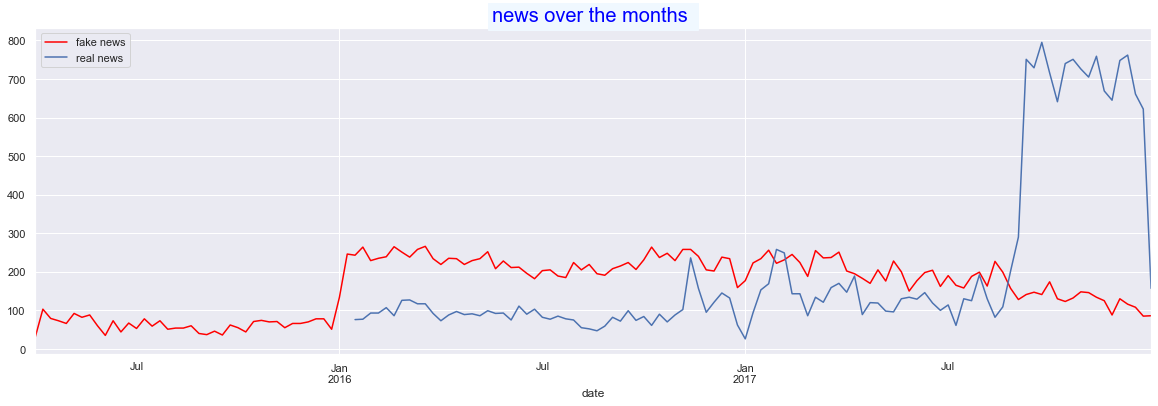

In [49]:
plt.figure(figsize=(20,6))
combined_news_ds[combined_news_ds['label']==0].groupby([pd.Grouper(key='date', freq='W')])['label'].count().plot(kind='line',label='fake news',c='red')
combined_news_ds[combined_news_ds['label']==1].groupby([pd.Grouper(key='date', freq='W')])['label'].count().plot(kind='line',label='real news')
plt.title("news over the months ",
          fontsize='20',
          backgroundcolor='aliceblue',
          color='blue')
plt.legend();

<b> We can see above how was the news collection over the months. </b> 

In [50]:
combined_news_ds['text'] = combined_news_ds['title'] + " " + combined_news_ds['text']
combined_news_ds = combined_news_ds.drop(['title', 'subject', 'date'], axis=1)

In [51]:
combined_news_ds.head(5)

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


<b> The final step of the data preparation was to concatenate the title column and the text column into one and drop all the columns that wont be used for our model. As we can see above, the columns to be droped were the title, subject and date. </b>

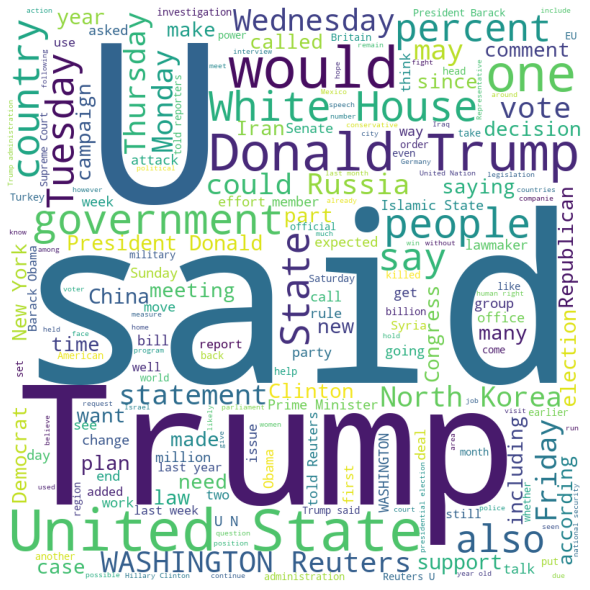

In [52]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(combined_news_ds[combined_news_ds['label'] == 1].text)) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<b> Above we displayed the most used words in the true news label. It is important to mention that the stop words are removed. Stop words are common words in a language.  </b> 

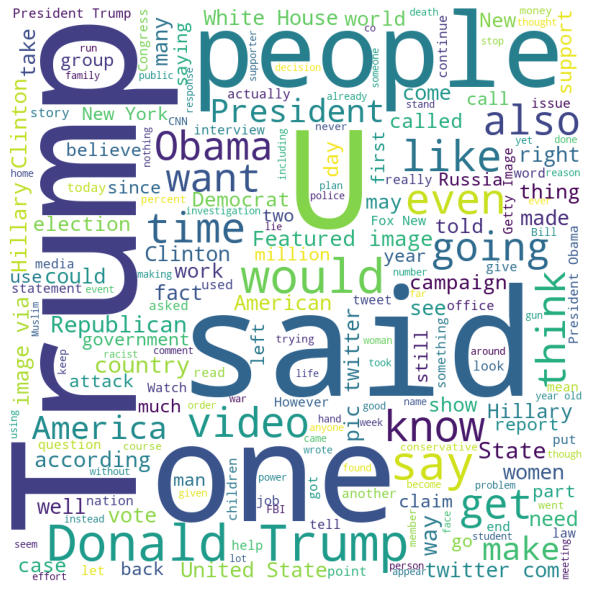

In [53]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(combined_news_ds[combined_news_ds['label'] == 0].text)) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<b> Above we displayed the most used words in the fake news label. It is important to mention that the stop words are also removed on this plot. </b> 

C:\Users\raelg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

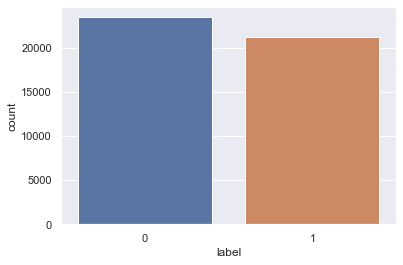

In [54]:
sns.countplot(combined_news_ds['label'])

<b> We can see above that we do not have a good balance between the real and the fake news. It means that we will need to perform oversampling operation before implementing the model.  </b> 

In [55]:
combined_news_ds['label'].value_counts()

0    23433
1    21211
Name: label, dtype: int64

In [56]:
fake_news = combined_news_ds[(combined_news_ds['label']==0)] 
real_news = combined_news_ds[(combined_news_ds['label']==1)] 

real_news_upsampled = resample(real_news, 
                                 n_samples= 23433, 
                                 random_state=50)  

combined_news_ds = pd.concat([real_news_upsampled, fake_news])

<b> create two different dataframe of fake and real news class</b>
<b> upsample real news class, matching fake news class amount and using 50 samples from real news class to be duplicated</b>
<b> Combine fake news class with upsampled real news class</b>

In [57]:
combined_news_ds['label'].value_counts()

1    23433
0    23433
Name: label, dtype: int64

C:\Users\raelg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

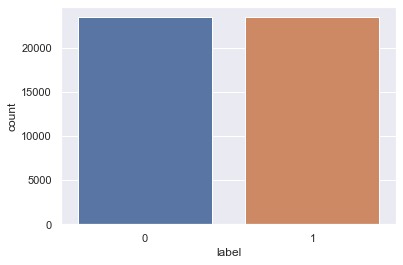

In [58]:
sns.countplot(combined_news_ds['label'])

<b> The reason for using oversampling instead of undersampling is because the undersampling removes ramdom entries from the higher class and this action might remove important data. </b>

# Choose model to Implement based on its performace

In [59]:
X = combined_news_ds['text']
y = combined_news_ds['label']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [61]:
models = []
models.append(('SVC', LinearSVC()))
models.append(('NB', MultinomialNB()))
models.append(('LR', LogisticRegression()))

<b> <FONT COLOR = "ff0000">  LinearSVC() </FONT> --> creates a line/hyperplane to separate the data into classes. Maps the data to categorize the data points. The data is transformed in a way that the separator between them can be drawn as a hyperplane. It uses the characteristics of new data to predict the group it belongs.</b>

<b> <FONT COLOR = "ff0000"> MultinomialNB() </FONT> --> guesses the tag of the data using Bayes Theorem, them it calculates each tag’s probability of a given sample and outputs the tag with greatest chance.</b>

<b> <FONT COLOR = "ff0000"> LogisticRegression() </FONT>--> is uses mathematics in order to find relationship between 2 data features. </b>

In [62]:
results = []
names = []

for name, model in models:
    
    pipe = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('Transformer', TfidfTransformer()),
    ('model', model)
    ])
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVC: 0.996453 (0.000877)
NB: 0.943562 (0.004010)
LR: 0.989251 (0.001761)


<p> <b> Used CountVectorizer() to convert the text to numerical data </b> </p>
<b> Used TfidfTransformer() to transform a count matrix to a normalized tf or tf-idf representation</b>

<p> <b> Used test harness technique to get the model accuracy. Used stratified 10-fold cross validation. It splits the data into 10 parts, trains on 9 and tests on 1. This process repeats for all combinations of train-test splits. Stratified assures that each split of the data used in the model training have the same distribution of sample by class. The random seed is set via the random_state argument to a fixed number. It ensures that each model is evaluated on the same splits of the training data.</b></p>

<p> <b> Linear SVC has better results  because it works better with unstructured and semi-unstructured data, such as text and images, making it better than Logistic Regression model. Linear SVC has better results for linear and non-linear problems, making it better than naive Bayes model. </b> </p>

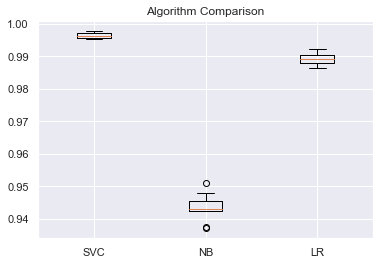

In [63]:
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

<b> We can see that the box and whisker plots shows that the Linear SVC and the Logistic Regression evaluation results has a short spread, having Linear SVC with a higher mean accuracy. The Naive Bayes has a larger spread with a lower mean accuracy score</b>

# Fake News Detection Model Implementation

In [64]:
X = combined_news_ds['text']
y = combined_news_ds['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)


pipe = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('Transformer', TfidfTransformer()),
    ('model', LinearSVC())
])

model = pipe.fit(X_train, y_train)

train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, train_prediction)
train_precision = precision_score(y_train, train_prediction)

test_accuracy = metrics.accuracy_score(y_test, test_prediction)
test_precision = precision_score(y_test, test_prediction)

print("train_accuracy: %0.3f" % (train_accuracy*100), " train_precision: %0.3f" % (train_precision*100))
print("test_accuracy: %0.3f" % (test_accuracy*100), " test_precision: %0.3f" % (test_precision*100))

train_accuracy: 99.971  train_precision: 99.957
test_accuracy: 99.669  test_precision: 99.618


Text(66.5, 0.5, 'Truth')

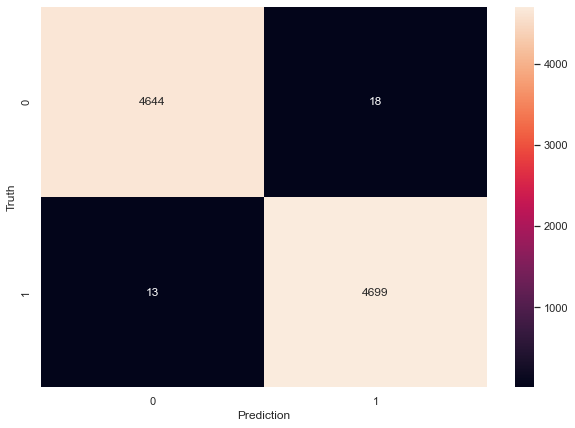

In [65]:
cm = confusion_matrix(y_test, test_prediction)
cm

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')